###This script combines the data from the UCI HAR Dataset into a more usable format.
### The data is combined into a single csv file for each subject and activity.
### The data is then stored in the Combined folder.

In [7]:
from google.colab import files
uploaded = files.upload()


Saving UCI HAR Dataset.zip to UCI HAR Dataset.zip


In [8]:
import zipfile

with zipfile.ZipFile("UCI HAR Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("./")


In [9]:
import pandas as pd
import numpy as np
import os

# Paths for train and test sets
train_folder = "./UCI HAR Dataset/train"
test_folder = "./UCI HAR Dataset/test"

# Activity label dictionary
activity_map = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

# ======================================================================
# Combine Train Data
# ======================================================================

# Read accelerometer signal files for training
accx_train = pd.read_csv(os.path.join(train_folder, "Inertial Signals", "total_acc_x_train.txt"), sep=r'\s+'
, header=None)
accy_train = pd.read_csv(os.path.join(train_folder, "Inertial Signals", "total_acc_y_train.txt"), sep=r'\s+'
, header=None)
accz_train = pd.read_csv(os.path.join(train_folder, "Inertial Signals", "total_acc_z_train.txt"), sep=r'\s+'
, header=None)

# Read subject IDs for training
sub_train_ids = pd.read_csv(os.path.join(train_folder, "subject_train.txt"), sep=r'\s+'
, header=None)

# Read labels for training
sub_train_labels = pd.read_csv(os.path.join(train_folder, "y_train.txt"), sep=r'\s+'
, header=None)

# Process each subject in train set
for subj_code in np.unique(sub_train_ids.values):
    subj_rows = np.where(sub_train_ids.iloc[:, 0] == subj_code)[0]
    subj_labels = sub_train_labels.loc[subj_rows]

    # Process each activity for this subject
    for act_code in np.unique(subj_labels.values):
        act_title = activity_map[act_code]
        save_path_dir = os.path.join("Combined", "Train", act_title)

        if not os.path.exists(save_path_dir):
            os.makedirs(save_path_dir)

        act_row_idx = subj_labels[subj_labels.iloc[:, 0] == act_code].index
        accx, accy, accz = [], [], []

        # Loop through rows for this activity
        for r in act_row_idx:
            if len(accx) > 0:
                accx = np.hstack((accx, accx_train.loc[r][64:]))
                accy = np.hstack((accy, accy_train.loc[r][64:]))
                accz = np.hstack((accz, accz_train.loc[r][64:]))
            else:
                accx = accx_train.loc[r]
                accy = accy_train.loc[r]
                accz = accz_train.loc[r]

        # Save combined data for this subject-activity
        combined_df = pd.DataFrame({"accx": accx, "accy": accy, "accz": accz})
        save_file_path = os.path.join(save_path_dir, f"sub_{subj_code}.csv")
        combined_df.to_csv(save_file_path, index=False)

print("Training data combined successfully.")

# ======================================================================
# Combine Test Data
# ======================================================================

# Read accelerometer signal files for testing
accx_test = pd.read_csv(os.path.join(test_folder, "Inertial Signals", "total_acc_x_test.txt"), sep=r'\s+'
, header=None)
accy_test = pd.read_csv(os.path.join(test_folder, "Inertial Signals", "total_acc_y_test.txt"), sep=r'\s+'
, header=None)
accz_test = pd.read_csv(os.path.join(test_folder, "Inertial Signals", "total_acc_z_test.txt"), sep=r'\s+'
, header=None)

# Read subject IDs for testing
sub_test_ids = pd.read_csv(os.path.join(test_folder, "subject_test.txt"), sep=r'\s+'
, header=None)

# Read labels for testing
sub_test_labels = pd.read_csv(os.path.join(test_folder, "y_test.txt"), sep=r'\s+'
, header=None)

# Process each subject in test set
for subj_code in np.unique(sub_test_ids.values):
    subj_rows = np.where(sub_test_ids.iloc[:, 0] == subj_code)[0]
    subj_labels = sub_test_labels.loc[subj_rows]

    # Process each activity for this subject
    for act_code in np.unique(subj_labels.values):
        act_title = activity_map[act_code]
        save_path_dir = os.path.join("Combined", "Test", act_title)

        if not os.path.exists(save_path_dir):
            os.makedirs(save_path_dir)

        act_row_idx = subj_labels[subj_labels.iloc[:, 0] == act_code].index
        accx, accy, accz = [], [], []

        # Loop through rows for this activity
        for r in act_row_idx:
            if len(accx) > 0:
                accx = np.hstack((accx, accx_test.loc[r][64:]))
                accy = np.hstack((accy, accy_test.loc[r][64:]))
                accz = np.hstack((accz, accz_test.loc[r][64:]))
            else:
                accx = accx_test.loc[r]
                accy = accy_test.loc[r]
                accz = accz_test.loc[r]

        # Save combined data for this subject-activity
        combined_df = pd.DataFrame({"accx": accx, "accy": accy, "accz": accz})
        save_file_path = os.path.join(save_path_dir, f"sub_{subj_code}.csv")
        combined_df.to_csv(save_file_path, index=False)

print("Test data combined successfully.")



Training data combined successfully.
Test data combined successfully.


In [18]:
!pip install tsfel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.6 MB/s eta 0:00:00


In [19]:
# Imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time_sec = 10
start_offset = 100
activity_folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
activity_labels = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3,
                   "SITTING": 4, "STANDING": 5, "LAYING": 6}

combined_path = os.path.join("Combined")

# ---------------- Train Dataset ----------------
X_train_list = []
y_train_list = []
train_path = os.path.join(combined_path, "Train")

for activity in activity_folders:
    files_list = os.listdir(os.path.join(train_path, activity))
    for file_name in files_list:
        df = pd.read_csv(os.path.join(train_path, activity, file_name), sep=",")
        df = df[start_offset:start_offset + time_sec * 50]
        X_train_list.append(df.values)
        y_train_list.append(activity_labels[activity])

X_train_array = np.array(X_train_list)
y_train_array = np.array(y_train_list)

# ---------------- Test Dataset ----------------
X_test_list = []
y_test_list = []
test_path = os.path.join(combined_path, "Test")

for activity in activity_folders:
    files_list = os.listdir(os.path.join(test_path, activity))
    for file_name in files_list:
        df = pd.read_csv(os.path.join(test_path, activity, file_name), sep=",", header=0)
        df = df[start_offset:start_offset + time_sec * 50]
        X_test_list.append(df.values)
        y_test_list.append(activity_labels[activity])

X_test_array = np.array(X_test_list)
y_test_array = np.array(y_test_list)

# ---------------- Final Dataset ----------------
X_all = np.concatenate((X_train_array, X_test_array))
y_all = np.concatenate((y_train_array, y_test_array))

seed_value = 4
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.3, random_state=seed_value, stratify=y_all
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# ---------------- Next Steps Imports ----------------
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
%config InlineBackend.figure_format='retina'


Training data shape: (126, 500, 3)
Testing data shape: (54, 500, 3)


# Task 1

#Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


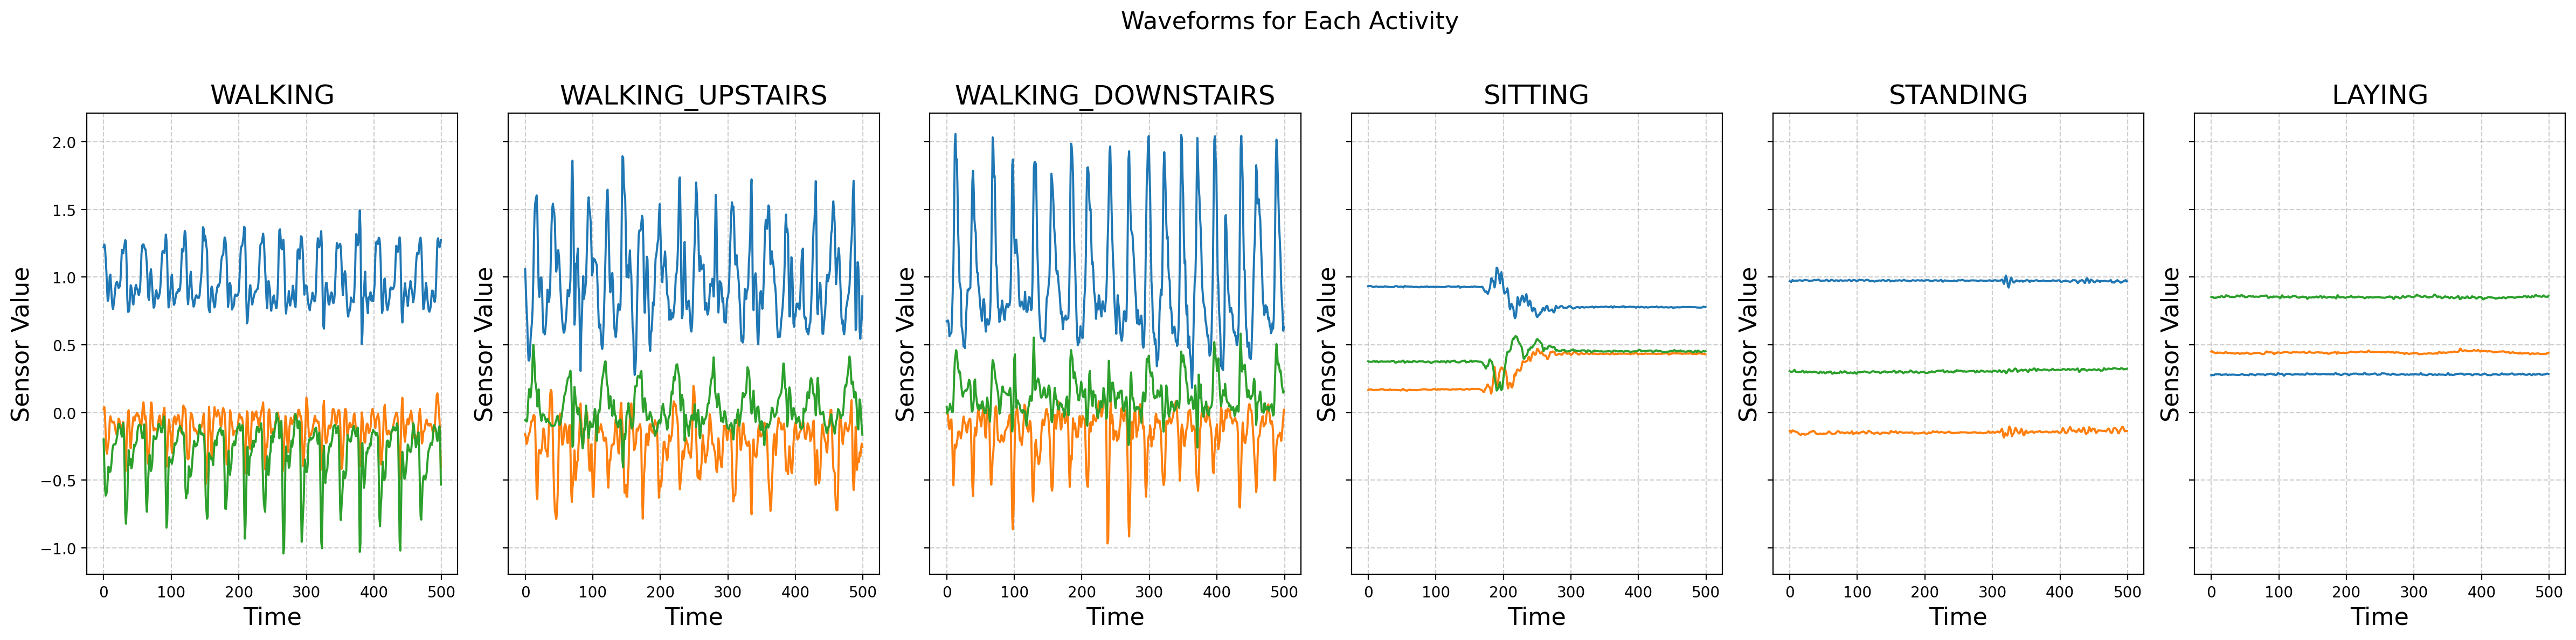

In [28]:
# Map class labels back to activity names
act_map = {val: key for key, val in classes.items()}
print(act_map)

# Pick one sample per activity class (slight change in sample index)
picked_samples = {}
for lbl in classes.values():
    picked_samples[lbl] = X_train[y_train == lbl][4]

# Plot the waveforms
fig, axs = plt.subplots(1, 6, figsize=(24, 6), sharey=True)  # reduced size
fig.suptitle('Waveforms for Each Activity', fontsize=16)

for idx, (lbl, samp) in enumerate(picked_samples.items()):
    axs[idx].plot(samp, linewidth=1.4)
    axs[idx].set_title(act_map[lbl], fontsize=18)
    axs[idx].set_xlabel('Time', fontsize=16)
    axs[idx].set_ylabel('Sensor Value', fontsize=16)
    axs[idx].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Static activities → The body isn’t moving much. The acceleration magnitude (√(accX² + accY² + accZ²)) stays almost constant because it’s mostly just gravity. The values are smooth and change very little (low variance).
Dynamic activities → The body is in motion. The acceleration magnitude changes a lot with every step, swinging up and down in a repeating pattern. This gives larger changes (high variance) and higher average values.
If we plot and measure this magnitude over time:
Static → flat lines, low variation.
Dynamic → wavy lines, large variation.
So, we could simply set a threshold on the variance or mean of the acceleration magnitude to separate the two groups. A machine learning model is mainly needed if we want to distinguish between activities within the same group (e.g., sitting vs standing, or walking upstairs vs downstairs).
Using waveform charts, a machine learning model might still be able to classify an activity as static or dynamic. But without extra features or preprocessing, predicting the exact type of activity within those groups can be difficult.
Feature extraction methods (like TSFEL) can convert time-series data into useful metrics that better capture differences between activities. Also, scaling and normalizing the data can help models train faster and perform better.

#Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration (accx^2+accy^2+accz^2) for each activity and justify your answer.

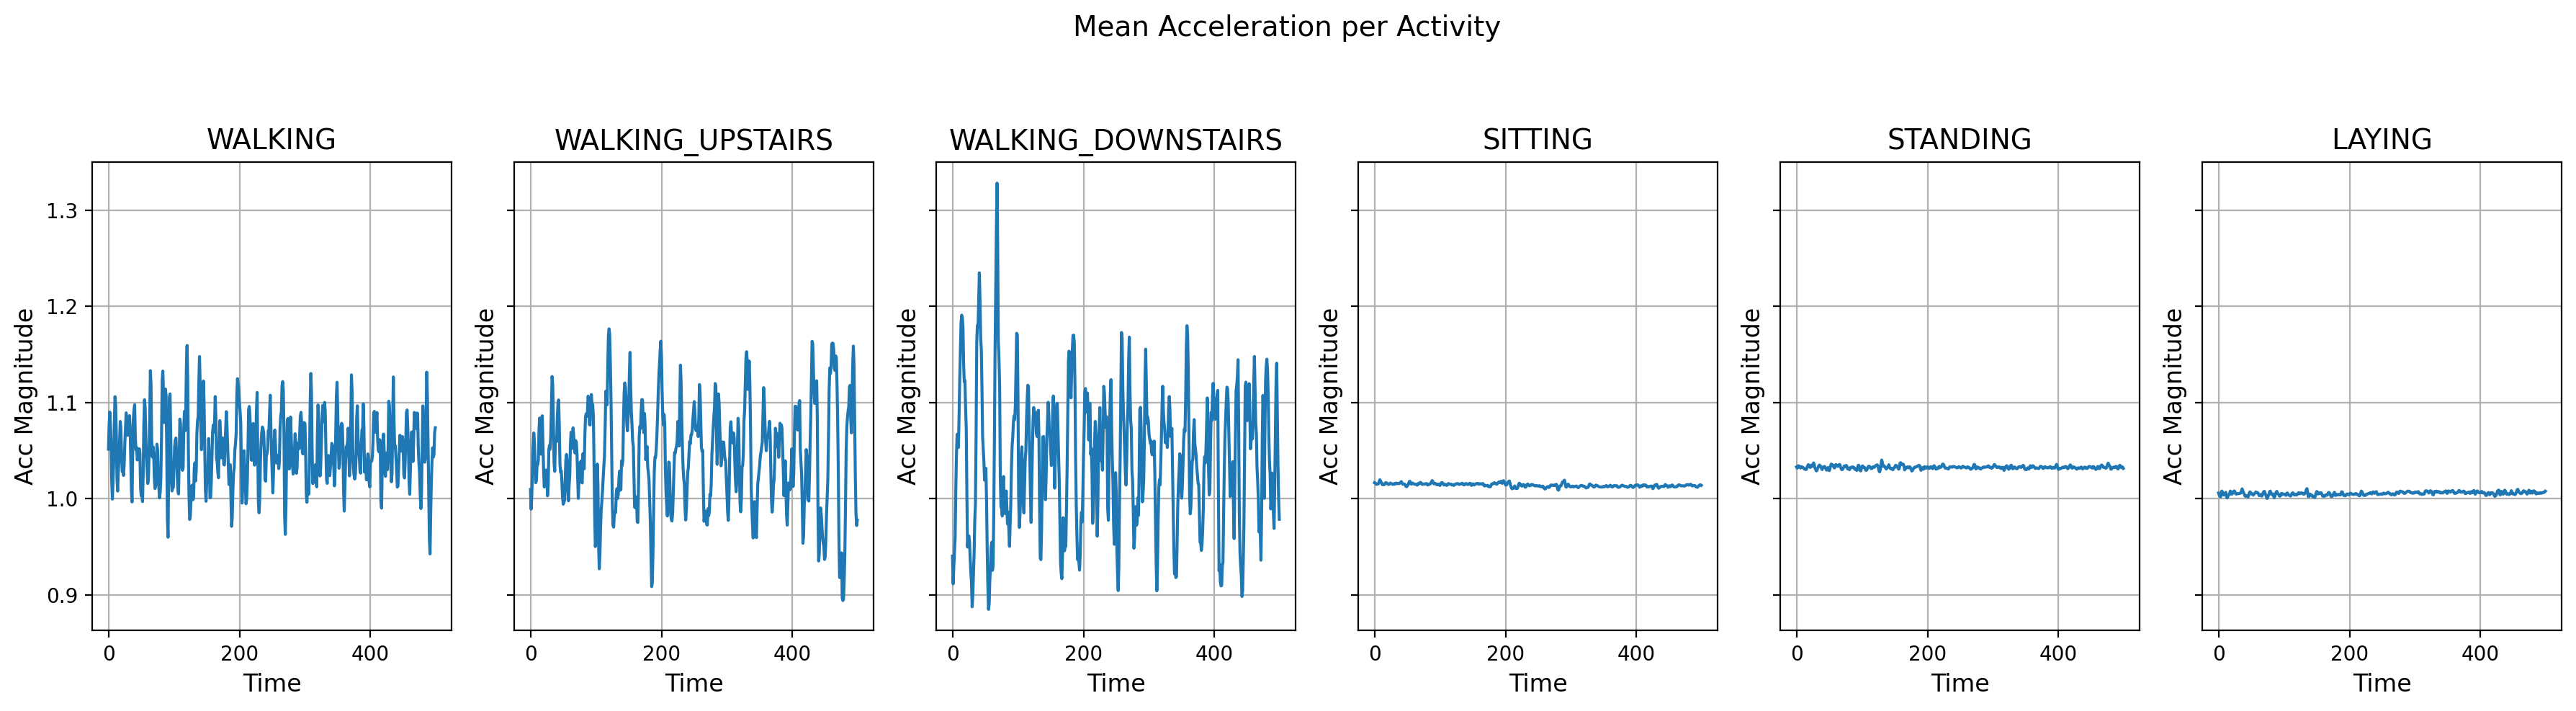

In [29]:
# Compute total linear acceleration magnitude for training set
totacc= np.sqrt(np.sum(X_train**2, axis=2))

# Convert to DataFrame
acc_mag_df = pd.DataFrame(acc_mag_train)
acc_mag_df['act'] = y_train  # activity labels

# Group by activity and compute mean waveform
mean_acc_df = acc_mag_df.groupby('act').mean()
mean_acc_arr = np.array(mean_acc_df)

# Plot mean waveforms for each activity (smaller size)
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)
fig.suptitle('Mean Acceleration per Activity', fontsize=14)

for i in range(6):
    axs[i].plot(mean_acc_arr[i])
    axs[i].set_title(activity[i+1], fontsize=14)
    axs[i].set_xlabel('Time', fontsize=12)
    axs[i].set_ylabel('Acc Magnitude', fontsize=12)
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


The graphs show that for dynamic activities, the mean acceleration changes a lot over time, showing the regular movement of walking. For static activities, the lines are almost flat and stable. Because of these clear differences, we can use a simple rule or threshold to tell static and dynamic activities apart. A machine learning model can also be used for this.
We can make the model work better by creating useful features from the data. Sensor readings can sometimes be noisy or inconsistent because of the environment or sensor problems, so cleaning and processing the data is important.
Overall, a machine learning model can be a strong solution, and it will give more accurate results if we choose the right features, model type, and test it well.

#Visualize the data using PCA. [1 marks]

#1. Use PCA (Principal Component Analysis) on Total Acceleration (accx^2+accy^2+accz^2) to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.


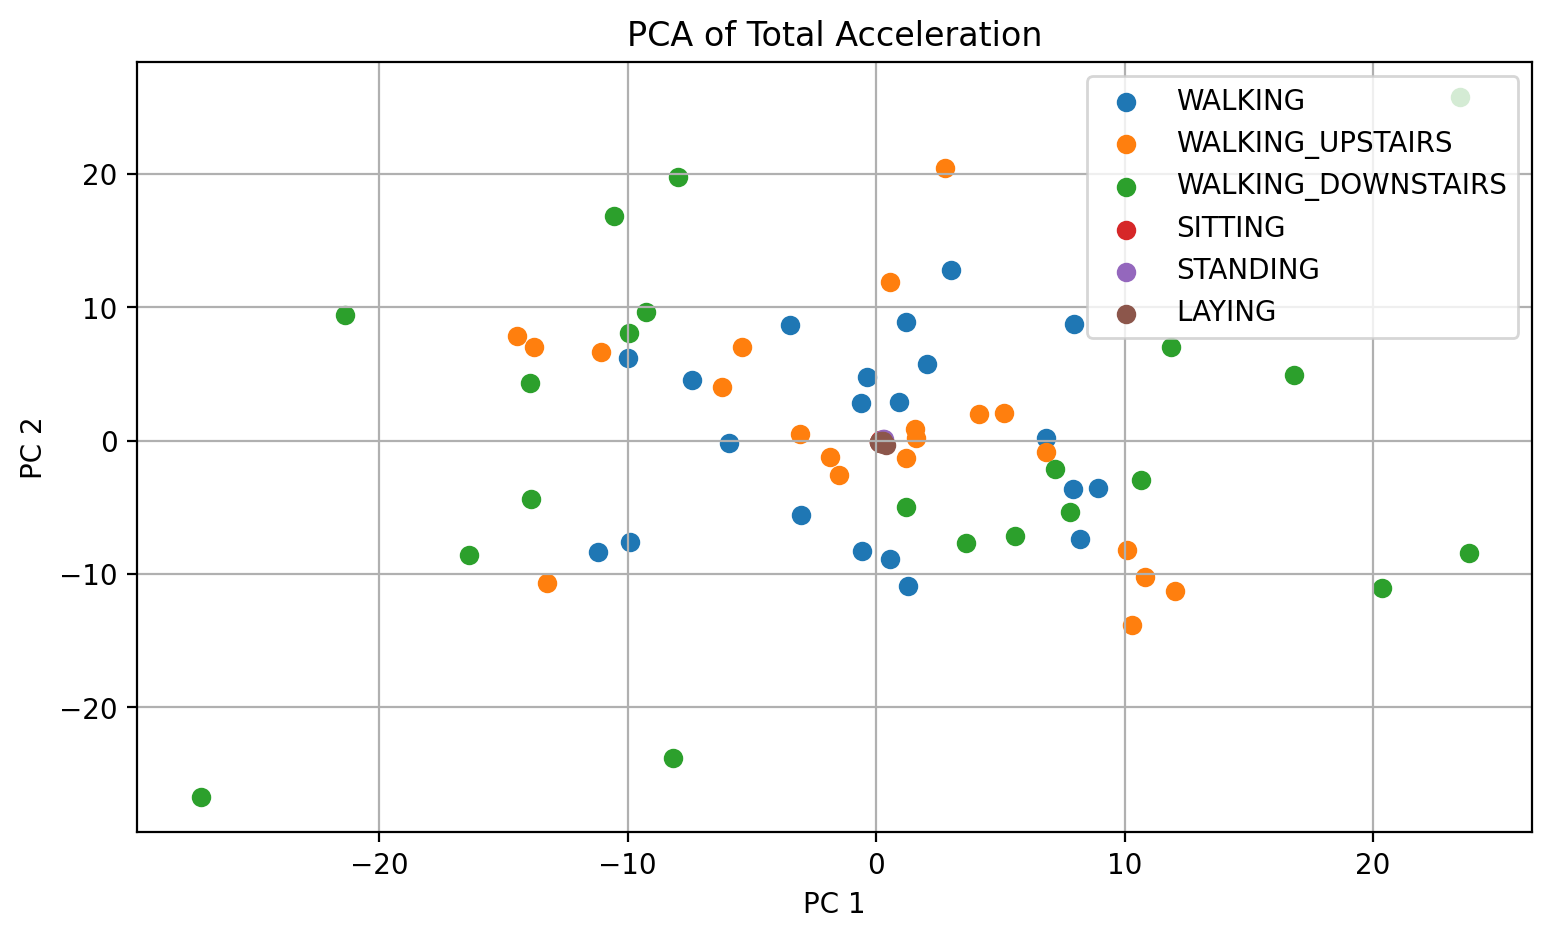

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Scaling total acceleration
scaler_acc = StandardScaler()
acc_total_scaled = scaler_acc.fit_transform(totacc)

# PCA transformation
pca_acc = PCA(n_components=2)
acc_pca = pca_acc.fit_transform(acc_total_scaled)

# Plot the PCA results
plt.figure(figsize=(9, 5))
for lbl in np.unique(y_train):
    plt.scatter(acc_pca[y_train == lbl, 0], acc_pca[y_train == lbl, 1], label=activity[lbl])

plt.title('PCA of Total Acceleration')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True)
plt.show()


#2. Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

/tmp/ipython-input-1533042889.py:17: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df_sample, sample_rate=50, verbose=False)
/tmp/ipython-input-1533042889.py:17: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df_sample, sample_rate=50, verbose=False)
/tmp/ipython-input-1533042889.py:17: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df_sample, sample_rate=50, verbose=False)
/tmp/ipython-input-1533042889.py:17: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df_sample, sample_rate=50, verbose=False)
/tmp/ipython-input-1533042889.py:17: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df_samp

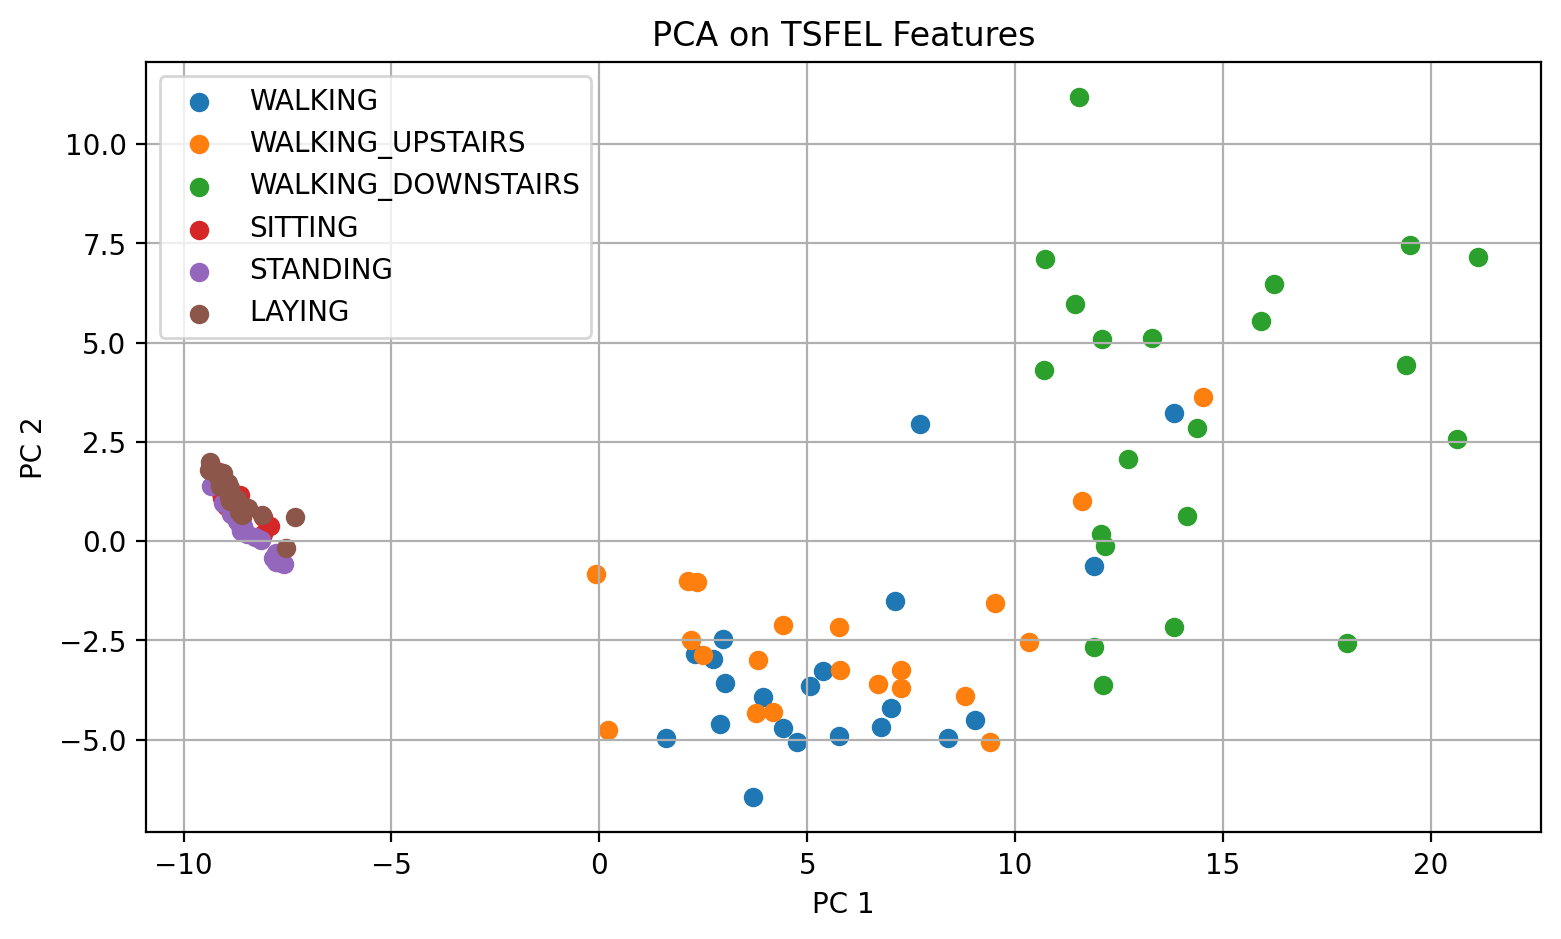

In [34]:
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to extract TSFEL features
def extract_features(data):
    config = tsfel.get_features_by_domain()
    feat_list = []

    for sample in data:
        df_sample = pd.DataFrame(sample, columns=['total_acc'])
        try:
            # Extract features
            feats = tsfel.time_series_features_extractor(config, df_sample, sample_rate=50, verbose=False)
            feat_flat = feats.values.flatten()
            feat_list.append(feat_flat)
        except Exception as e:
            print(f"Feature extraction error: {e}")

    return pd.DataFrame(feat_list)

# total_acceleration = np.sqrt(np.sum(X_train**2, axis=2))
tsfel_features = extract_features(totacc)

# Scale features
scaler_tsfel = StandardScaler()
tsfel_scaled = scaler_tsfel.fit_transform(tsfel_features)

# PCA to reduce to 2D
pca_tsfel = PCA(n_components=2)
tsfel_pca = pca_tsfel.fit_transform(tsfel_scaled)

# Plot PCA scatter
plt.figure(figsize=(9, 5))
for lbl in np.unique(y_train):
    plt.scatter(tsfel_pca[y_train == lbl, 0], tsfel_pca[y_train == lbl, 1], label=activity[lbl])

plt.title("PCA on TSFEL Features")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()


#3.Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1381057713.py:2: SyntaxWarning: invalid escape sequence '\s'
  X_feat = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
/tmp/ipython-input-1381057713.py:3: SyntaxWarning: invalid escape sequence '\s'
  y_feat = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)


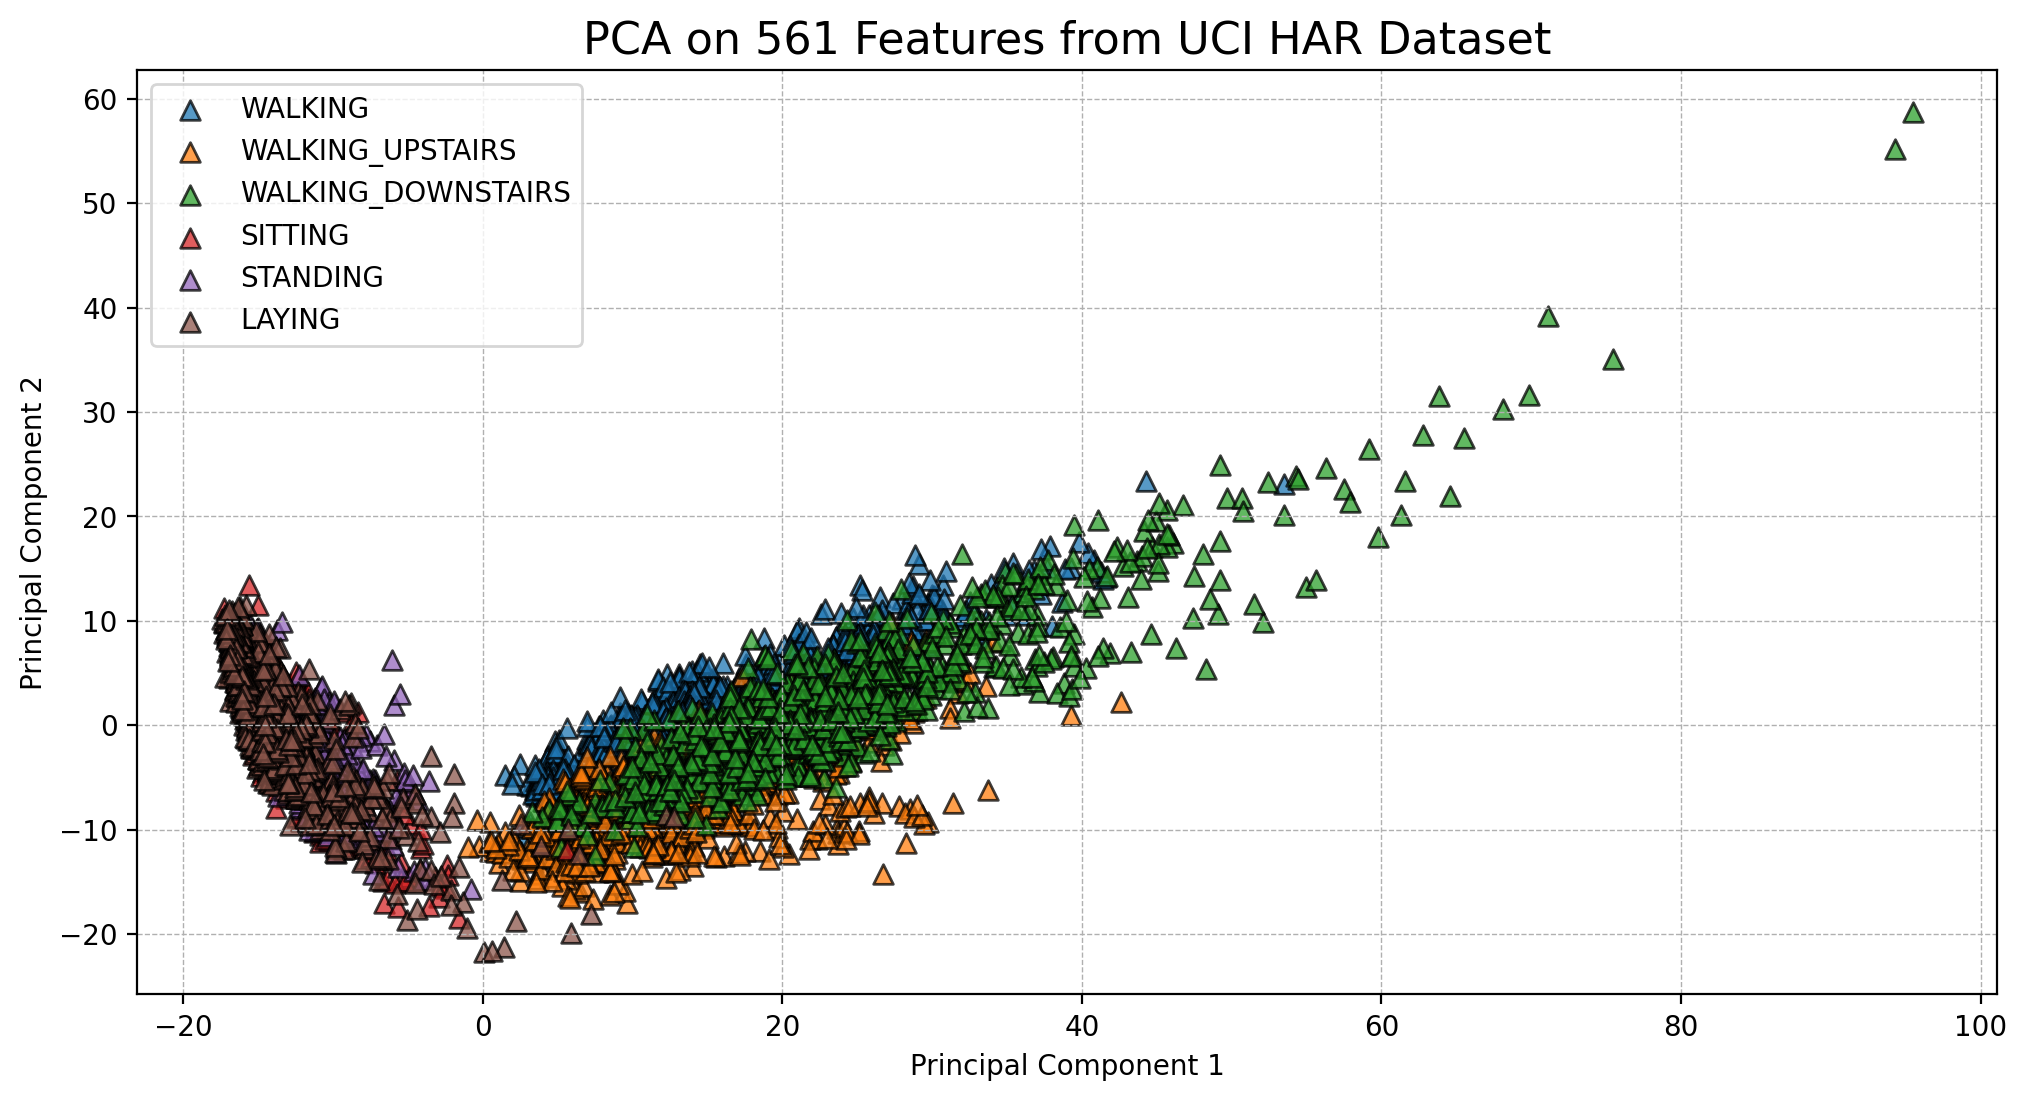

In [38]:
# Load dataset features
X_feat = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
y_feat = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)

# Standardize
scaler_feat = StandardScaler()
X_feat_scaled = scaler_feat.fit_transform(X_feat)

# PCA
pca_feat = PCA(n_components=2)
X_feat_pca = pca_feat.fit_transform(X_feat_scaled)

# Plot with stylistic changes
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx in np.unique(y_feat.values):
    plt.scatter(
        X_feat_pca[y_feat[0] == idx, 0],
        X_feat_pca[y_feat[0] == idx, 1],
        label=activity[idx],
        s=50, alpha=0.75, edgecolor='k', marker='^', c=colors[idx-1]
    )

plt.title('PCA on 561 Features from UCI HAR Dataset', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


#4. Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

PCA on Total Acceleration: This method can separate activities with large differences in movement, like sitting versus walking upstairs. However, it may miss subtle differences or timing patterns. Some classes, like walking and walking downstairs, overlap a bit, so the separation is only moderate.
PCA on TSFEL Features: TSFEL calculates many useful features from the time series, capturing more information than raw acceleration. Classes are clearer and better separated compared to total acceleration. This often gives the most meaningful PCA visualization because it considers several important characteristics instead of just the raw signals.
PCA on Raw Dataset Features: Using all 561 original features keeps all the information, but the PCA plot can be noisy and hard to read. Clusters may overlap because the data has too many dimensions. While groups generally form, the separation isn’t perfect, and some classes still mix.
Observations: In the total acceleration PCA, it’s hard to pick out individual activities clearly. PCA on the dataset features forms clusters, similar to TSFEL, but overlapping is more noticeable because it captures too much detail. In the TSFEL PCA plot, the laying class stands out along the first principal component, showing that it captures relevant information. Some overlaps remain, which may be due to the features not fully capturing the differences or the activities naturally being similar in some parts.
Conclusion: Among the three approaches, PCA on TSFEL features is the best for visualization since it provides clearer separation for at least one class and overall more meaningful grouping.

#Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

In [43]:
# --- Step 1: Feature extraction from TSFEL ---
def extract_tsfel_features(X):
    config = tsfel.get_features_by_domain()
    features_list = []
    for sample in X:
        df = pd.DataFrame(sample, columns=['total_acc'])
        try:
            feats = tsfel.time_series_features_extractor(config, df, sample_rate=50, verbose=False)
            features_list.append(feats.values.flatten())
        except Exception as e:
            print(f"Error extracting features: {e}")
    return pd.DataFrame(features_list)

# Assuming total_acceleration is already computed from X_train
# total_acceleration = np.sqrt(np.sum(X_train**2, axis=2))
X_features = extract_tsfel_features(totacc)

# Scale TSFEL features
scaler_tsfel = StandardScaler()
X_features_scaled = scaler_tsfel.fit_transform(X_features)

# --- Step 2: Scale provided 561-feature dataset ---
X_train_561 = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
scaler_561 = StandardScaler()
X_train_561_scaled = scaler_561.fit_transform(X_train_561)

# --- Step 3: Compute correlation matrices ---
tsfel_df = pd.DataFrame(X_features_scaled)
dataset_df = pd.DataFrame(X_train_561_scaled)

corr_tsfel = tsfel_df.corr()
corr_provided = dataset_df.corr()

print("TSFEL Features Correlation Matrix:")
print(corr_tsfel)

print("\nDataset Provided Features Correlation Matrix:")
print(corr_provided)

# --- Step 4: Identify highly correlated features ---
def find_high_corr_features(corr_matrix, threshold=0.8):
    pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return pairs

high_corr_tsfel = find_high_corr_features(corr_tsfel)
high_corr_provided = find_high_corr_features(corr_provided)

print("\nHighly Correlated Features (TSFEL):")
for f1, f2, val in high_corr_tsfel:
    print(f"{f1} and {f2} -> correlation {val:.2f}")

print("\nHighly Correlated Features (Dataset Provided):")
for f1, f2, val in high_corr_provided:
    print(f"{f1} and {f2} -> correlation {val:.2f}")

# --- Step 5: Identify redundant features ---
def redundant_features(corr_pairs):
    redundant = set()
    for f1, f2, _ in corr_pairs:
        redundant.add(f2)
    return redundant

redundant_tsfel = redundant_features(high_corr_tsfel)
redundant_provided = redundant_features(high_corr_provided)

print("\nRedundant Features (TSFEL):", redundant_tsfel)
print("\nRedundant Features (Dataset Provided):", redundant_provided)

/tmp/ipython-input-4183186912.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df, sample_rate=50, verbose=False)
/tmp/ipython-input-4183186912.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df, sample_rate=50, verbose=False)
/tmp/ipython-input-4183186912.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df, sample_rate=50, verbose=False)
/tmp/ipython-input-4183186912.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df, sample_rate=50, verbose=False)
/tmp/ipython-input-4183186912.py:8: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(config, df, sample_rate=50, verbose=False)
/tmp/

Streaming output truncated to the last 5000 lines.
505 and 366 -> correlation 0.86
505 and 367 -> correlation 0.85
505 and 368 -> correlation 0.85
505 and 389 -> correlation 0.82
505 and 393 -> correlation 0.81
505 and 423 -> correlation 0.83
505 and 425 -> correlation 0.84
505 and 429 -> correlation 0.82
505 and 431 -> correlation 0.83
505 and 438 -> correlation 0.85
505 and 444 -> correlation 0.83
505 and 445 -> correlation 0.84
505 and 446 -> correlation 0.84
505 and 447 -> correlation 0.86
505 and 502 -> correlation 0.93
505 and 503 -> correlation 0.98
505 and 504 -> correlation 0.94
507 and 3 -> correlation 0.97
507 and 4 -> correlation 0.94
507 and 5 -> correlation 0.89
507 and 6 -> correlation 0.97
507 and 7 -> correlation 0.93
507 and 8 -> correlation 0.88
507 and 9 -> correlation 0.97
507 and 10 -> correlation 0.91
507 and 11 -> correlation 0.87
507 and 12 -> correlation -0.96
507 and 13 -> correlation -0.93
507 and 14 -> correlation -0.88
507 and 15 -> correlation 0.97
507 an

###Task 2

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Flatten the raw accelerometer data for the Decision Tree
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

# Initialize the Decision Tree classifier
dt_model_raw = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model_raw.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred_raw = dt_model_raw.predict(X_test_flat)

# Evaluate performance
acc_raw = accuracy_score(y_test, y_pred_raw)
prec_raw = precision_score(y_test, y_pred_raw, average='weighted')
rec_raw = recall_score(y_test, y_pred_raw, average='weighted')
conf_mat_raw = confusion_matrix(y_test, y_pred_raw)

# Print results
print("Decision Tree Performance (Raw Accelerometer Data):")
print(f"Accuracy : {acc_raw:.3f}")
print(f"Precision: {prec_raw:.3f}")
print(f"Recall   : {rec_raw:.3f}")
print("Confusion Matrix:")
print(conf_mat_raw)


Decision Tree Performance (Raw Accelerometer Data):
Accuracy : 0.667
Precision: 0.658
Recall   : 0.667
Confusion Matrix:
[[2 4 1 0 2 0]
 [1 6 1 0 1 0]
 [1 2 4 1 1 0]
 [0 0 0 8 1 0]
 [1 0 0 1 7 0]
 [0 0 0 0 0 9]]


#TASK 2

#Use Sklearn Library to train Decision Tress.

1. Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

2. Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

3. Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

4. Compare the results of the three models. Which model do you think is better?

In [56]:
# ----------------------------
# TSFEL Feature Extraction Function
# ----------------------------
def extract_tsfel_features(acc_samples):
    """
    Extracts TSFEL features from raw acceleration samples.

    Parameters:
        acc_samples (np.array): shape (n_samples, timesteps)

    Returns:
        pd.DataFrame: extracted features for all samples
    """
    cfg = tsfel.get_features_by_domain()
    all_features = []

    for sample in acc_samples:
        df_sample = pd.DataFrame(sample, columns=['acc'])
        try:
            feats = tsfel.time_series_features_extractor(cfg, df_sample, sample_rate=50, verbose=False)
            all_features.append(feats.values.flatten())
        except Exception as err:
            print(f"Error extracting features: {err}")

    return pd.DataFrame(all_features)

# ----------------------------
# Prepare TSFEL features for training and testing
# ----------------------------
train_acc_features = extract_tsfel_features(totacc)  # totacc = total acceleration from X_train
test_acc_features = extract_tsfel_features(np.sqrt(np.sum(X_test**2, axis=2)))

# Standardize the features
scaler_tsfel = StandardScaler()
train_scaled = scaler_tsfel.fit_transform(train_acc_features)
test_scaled = scaler_tsfel.transform(test_acc_features)

# ----------------------------
# Train Decision Tree Classifier
# ----------------------------
dt_model_tsfel = DecisionTreeClassifier(random_state=42)
dt_model_tsfel.fit(train_scaled, y_train)

# Make predictions
pred_labels = dt_model_tsfel.predict(test_scaled)

# ----------------------------
# Evaluate the model
# ----------------------------
acc_score = accuracy_score(y_test, pred_labels)
prec_score = precision_score(y_test, pred_labels, average='weighted')
rec_score = recall_score(y_test, pred_labels, average='weighted')
conf_mat = confusion_matrix(y_test, pred_labels)

# ----------------------------
# Print the results
# ----------------------------
print("Decision Tree using TSFEL features:")
print(f"Accuracy: {acc_score:.3f}")
print(f"Precision: {prec_score:.3f}")
print(f"Recall: {rec_score:.3f}")
print("Confusion Matrix:")
print(conf_mat)


/tmp/ipython-input-2557008326.py:20: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df_sample, sample_rate=50, verbose=False)
/tmp/ipython-input-2557008326.py:20: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df_sample, sample_rate=50, verbose=False)
/tmp/ipython-input-2557008326.py:20: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df_sample, sample_rate=50, verbose=False)
/tmp/ipython-input-2557008326.py:20: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df_sample, sample_rate=50, verbose=False)
/tmp/ipython-input-2557008326.py:20: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df_sample, sample_rate

Decision Tree using TSFEL features:
Accuracy: 0.741
Precision: 0.808
Recall: 0.741
Confusion Matrix:
[[8 1 0 0 0 0]
 [1 8 0 0 0 0]
 [0 7 2 0 0 0]
 [0 0 0 7 1 1]
 [0 0 0 0 9 0]
 [0 0 0 3 0 6]]


In [58]:
# ----------------------------
# Load the dataset-provided features
# ----------------------------
X_tr = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_tr = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
X_te = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_te = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)

# ----------------------------
# Standardize the features
# ----------------------------
scaler_data = StandardScaler()
X_tr_scaled = scaler_data.fit_transform(X_tr)
X_te_scaled = scaler_data.transform(X_te)

# ----------------------------
# Initialize and train Decision Tree
# ----------------------------
dt_data = DecisionTreeClassifier(random_state=42)
dt_data.fit(X_tr_scaled, y_tr[0])  # Flatten y_tr DataFrame to Series

# ----------------------------
# Make predictions
# ----------------------------
y_pred_data = dt_data.predict(X_te_scaled)

# ----------------------------
# Compute evaluation metrics
# ----------------------------
acc_data = accuracy_score(y_te[0], y_pred_data)
prec_data = precision_score(y_te[0], y_pred_data, average='weighted')
rec_data = recall_score(y_te[0], y_pred_data, average='weighted')
conf_matrix_data = confusion_matrix(y_te[0], y_pred_data)

# ----------------------------
# Display results
# ----------------------------
print("Decision Tree using dataset-provided features:")
print(f"Accuracy: {acc_data:.3f}")
print(f"Precision: {prec_data:.3f}")
print(f"Recall: {rec_data:.3f}")
print("Confusion Matrix:")
print(conf_matrix_data)


/tmp/ipython-input-2202957852.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_tr = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-2202957852.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_tr = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-2202957852.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_te = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-2202957852.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_te =

Decision Tree using dataset-provided features:
Accuracy: 0.862
Precision: 0.863
Recall: 0.862
Confusion Matrix:
[[456  24  16   0   0   0]
 [ 74 369  28   0   0   0]
 [ 19  53 348   0   0   0]
 [  0   0   0 374 117   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]


Out of the three models, the decision tree trained on the dataset’s pre-engineered features (Model 3) performs the best. Model 2, using TSFEL features, comes next, and Model 1, using raw accelerometer data, performs the least well.
Model 1 works directly on the raw sensor data, which is high-dimensional and noisy. This makes it harder for the decision tree to learn patterns, leading to lower accuracy, precision, and recall.
Model 2 uses TSFEL features, which summarize the raw data into important patterns. This helps the decision tree classify activities better than using raw data. However, if the features are not well-chosen, performance may drop, and the model might overfit.
Model 3 uses features already designed for this dataset, chosen with domain knowledge. These features are easier for the model to understand and capture the most relevant information for distinguishing activities. That’s why Model 3 gives the best results among the three.

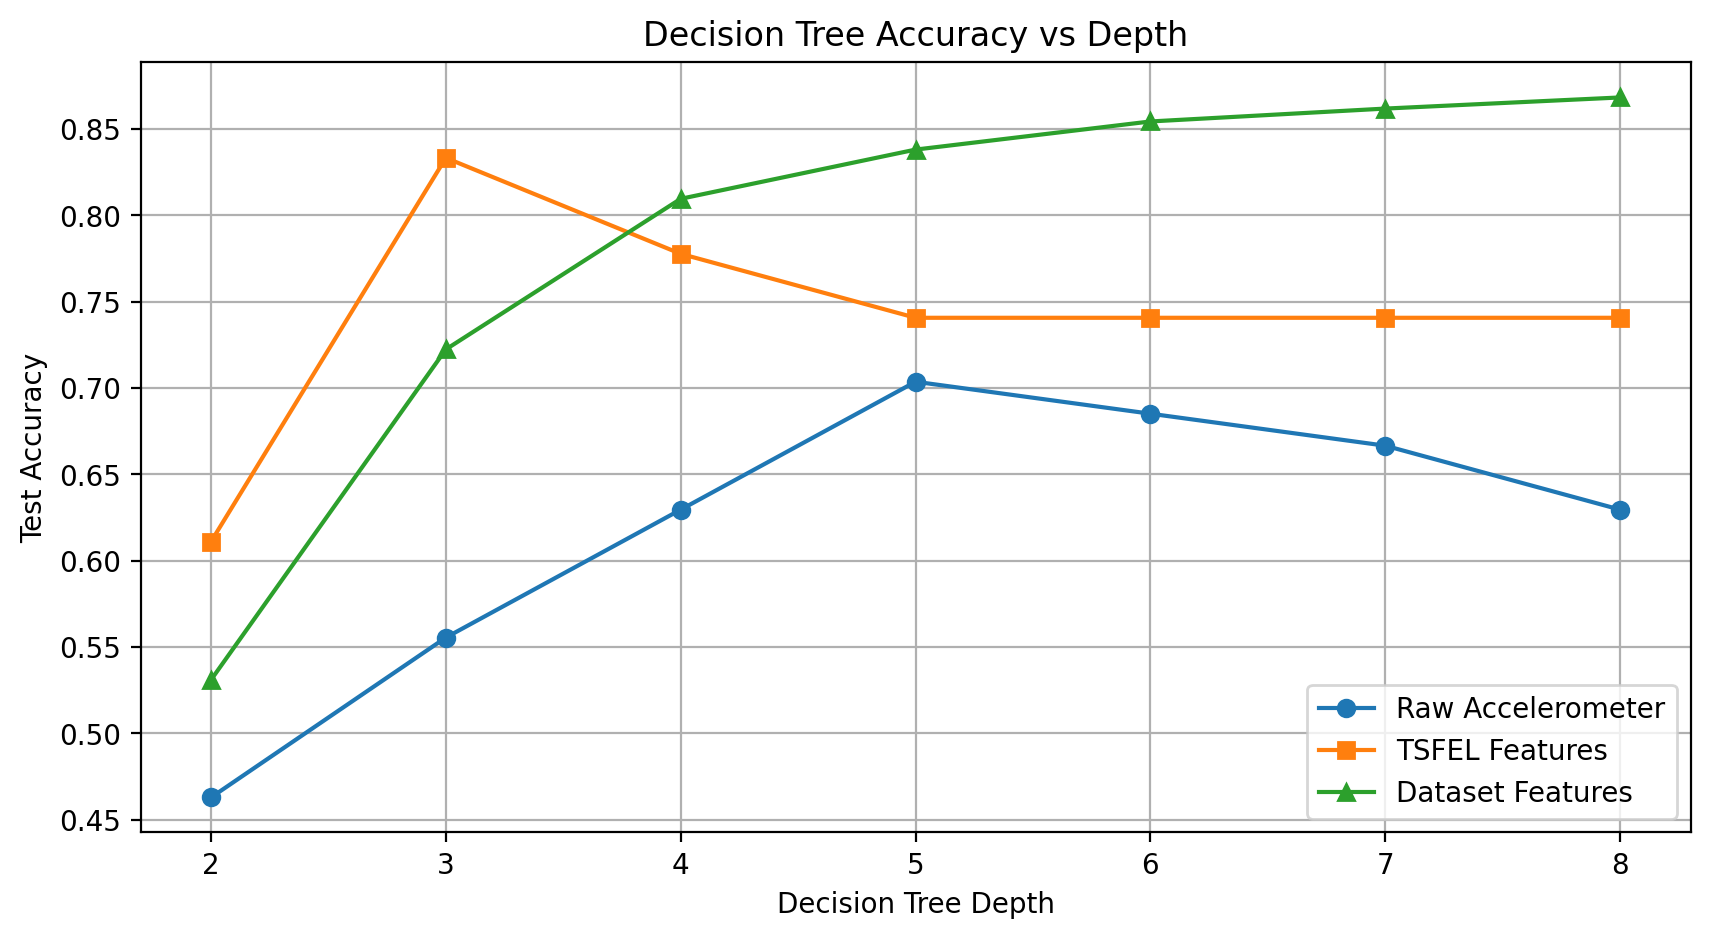

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- Explore tree depths ---
tree_depths = range(2, 9)

# --- Accuracy storage ---
acc_raw_data = []
acc_tsfel_data = []
acc_dataset_features = []

# --- Method 1: Raw Accelerometer Data ---
for depth in tree_depths:
    tree_raw = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_raw.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    pred_raw = tree_raw.predict(X_test.reshape(X_test.shape[0], -1))
    acc_raw_data.append(accuracy_score(y_test, pred_raw))

# --- Method 2: TSFEL Features ---
for depth in tree_depths:
    tree_tsfel = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_tsfel.fit(X_train_tsf_scaled, y_train)
    pred_tsfel = tree_tsfel.predict(X_test_tsf_scaled)
    acc_tsfel_data.append(accuracy_score(y_test, pred_tsfel))

# --- Method 3: Dataset-Provided Features ---
for depth in tree_depths:
    tree_data = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_data.fit(X_train_561_scaled, y_train_561[0])
    pred_data = tree_data.predict(X_test_561_scaled)
    acc_dataset_features.append(accuracy_score(y_test_561[0], pred_data))

# --- Plot accuracies ---
plt.figure(figsize=(10, 5))
plt.plot(tree_depths, acc_raw_data, marker='o', label='Raw Accelerometer')
plt.plot(tree_depths, acc_tsfel_data, marker='s', label='TSFEL Features')
plt.plot(tree_depths, acc_dataset_features, marker='^', label='Dataset Features')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Test Accuracy')
plt.title('Decision Tree Accuracy vs Depth')
plt.xticks(tree_depths)
plt.grid(True)
plt.legend()
plt.show()


##The confusion matrices give us a deeper insight into which activities the models struggle with.
##Model Trained on Raw Accelerometer Data:
\[
\begin{bmatrix}
2 & 4 & 1 & 0 & 2 & 0 \\
1 & 6 & 1 & 0 & 1 & 0 \\
1 & 2 & 4 & 1 & 1 & 0 \\
0 & 0 & 0 & 8 & 1 & 0 \\
1 & 0 & 0 & 1 & 7 & 0 \\
0 & 0 & 0 & 0 & 0 & 9
\end{bmatrix}
\]

This is the confusion matrix. The model finds it difficult to distinguish between "WALKING" (class 1) and "WALKING UPSTAIRS" (class 2). For instance, it sometimes predicts "WALKING UPSTAIRS" when the activity is actually "WALKING" and vice versa. This confusion arises because the movement patterns of these two activities are very similar. Similarly, "WALKING DOWNSTAIRS" (class 3) is occasionally misclassified as either "WALKING" or "WALKING UPSTAIRS." These errors happen because the raw data alone does not capture enough unique information to separate walking-based activities. On the other hand, "LAYING" (class 6) is perfectly classified by the model (all instances correct), likely because its low-motion pattern is clearly distinct from the other activities.
##Model Trained on TSFEL Features:
\[
\begin{bmatrix}
8 & 1 & 0 & 0 & 0 & 0 \\
1 & 8 & 0 & 0 & 0 & 0 \\
0 & 7 & 2 & 0 & 0 & 0 \\
0 & 0 & 0 & 7 & 1 & 1 \\
0 & 0 & 0 & 0 & 9 & 0 \\
0 & 0 & 0 & 3 & 0 & 6
\end{bmatrix}
\]


This is the confusion matrix. Compared to raw accelerometer data, the model trained on TSFEL features performs better at separating "WALKING" (class 1) and "WALKING UPSTAIRS" (class 2). TSFEL features capture useful time-series patterns that help the model differentiate between these activities. Most instances of "WALKING DOWNSTAIRS" (class 3) are also correctly classified, showing that TSFEL captures distinctive characteristics of this activity. However, confusion still exists among low-motion activities: "STANDING" (class 5) vs. "SITTING" (class 4) and "LAYING" (class 6) vs. "SITTING" (class 4). Even with extracted features, these activities are difficult to separate because their motion patterns are very similar. Overall, the model performs better than raw data but struggles with static activities.
##Model Trained on Pre-Engineered Dataset Features:

 \[
\begin{bmatrix}
456 & 24 & 16 & 0 & 0 & 0 \\
74 & 369 & 28 & 0 & 0 & 0 \\
19 & 53 & 348 & 0 & 0 & 0 \\
0 & 0 & 0 & 374 & 117 & 0 \\
0 & 0 & 0 & 75 & 457 & 0 \\
0 & 0 & 0 & 0 & 0 & 537
\end{bmatrix}
\]



This is the confusion matrix. Using the pre-engineered features, the model performs extremely well. Most activities are correctly classified, as reflected in the high diagonal values of the matrix. Walking activities, including "WALKING" (1), "WALKING UPSTAIRS" (2), and "WALKING DOWNSTAIRS" (3), are clearly separated, demonstrating that these features effectively capture subtle differences in movement. Misclassifications are minimal, with only some confusion between "SITTING" (4) and "STANDING" (5), due to their low-motion similarity. Overall, the pre-engineered features allow the decision tree to achieve the best performance across all activities.
##Overall Observations:
The confusion matrices suggest that the models struggle most with similar activities, such as "WALKING" vs. "WALKING UPSTAIRS" and "STANDING" vs. "SITTING." Low-motion activities like "SITTING," "STANDING," and "LAYING" are also challenging to separate due to similar, low-variation signals. The main reason for these errors is the similarity between the activities combined with insufficient feature representation to capture subtle differences in motion or posture.

##Q3
Yes, some activities are harder for the models to classify correctly.
Model 1 (Raw accelerometer data) struggles the most. It often confuses walking activities like “WALKING,” “WALKING UPSTAIRS,” and “WALKING DOWNSTAIRS” because their raw signals are very similar. Low-motion activities like “SITTING” and “STANDING” are also sometimes misclassified, but “LAYING” is easy to detect.
Model 2 (TSFEL features) does better for walking activities, but still makes mistakes with low-motion activities.
Model 3 (Pre-engineered dataset features) performs the best. Walking activities are clearly separated, and only a few errors happen between “SITTING” and “STANDING”, since they have very similar low-motion patterns.

#Task3

NameError: name 'folders' is not defined